In [205]:
from getData import get_data, get_ohlcv
from technical_indicator import LR, MACD, RSI, BB, ATR, ADX, RENKO
from Returns import cummulative_returns, CAGR, volatility, SHARPE, SORTINO, MAXDROWDOWN, CALMAR

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import copy
%load_ext autoreload
%autoreload 2
pd.set_option('mode.chained_assignment', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:

tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'BHARTIARTL.NS', 'ICICIBANK.NS', 'INFY.NS', 'SBIN.NS', 'HINDUNILVR.NS', 
           'BAJFINANCE.NS',
           'ITC.NS']
# '^NSEI', 

In [236]:
# Store data in dictionary
ohlcv_dict = {}
for stock in tickers:
    ohlcv_dict[stock] = get_ohlcv(ticker=stock, period = '2y', interval='1mo')


# data = copy.deepcopy(ohlcv_dict)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [237]:
NSE = get_ohlcv(ticker='^NSEI', period = '2y', interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [238]:
monthly_data = copy.deepcopy(ohlcv_dict)
NSE_DATA = copy.deepcopy(NSE)

In [239]:
# Calculate Monthly Return

NSE_DATA['mon_rtn'] = NSE['Close'].pct_change()
NSE_DATA.tail()

Price,Close,High,Low,Open,Volume,mon_rtn
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,
2024-10-01,24205.349609,25907.599609,24073.900391,25788.449219,6328000,-0.062203
2024-11-01,24131.099609,24537.599609,23263.150391,24302.750000,5887700,-0.003068
2024-12-01,23644.800781,24857.750000,23460.449219,24140.849609,5450800,-0.020152
2025-01-01,23508.400391,24226.699219,22786.900391,23637.650391,6458100,-0.005769
2025-02-01,22795.900391,23807.300781,22720.300781,23319.349609,4059200,-0.030308


In [240]:

def CAGR(data):
    # data = data.copy()
    n = len(data)/12
    data['cum_rtn'] = (1+ data['mon_rtn']).cumprod()
    data['CAGR'] =((data['cum_rtn'].iloc[-1]))**(1/n)-1
    return data
    
# Volatility

def volatility(data):
    data['VOL']  = (data['d_rtn'].std()* np.sqrt(12))
    return data

In [241]:
cummulative_returns(NSE_DATA)

Price,Close,High,Low,Open,Volume,mon_rtn,d_rtn,daily_returns,cum_rtn
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,
Date,,,,,,,,,
2023-03-01,17359.750000,17799.949219,16828.349609,17360.099609,5622200,NaN,NaN,NaN,NaN
2023-04-01,18065.000000,18089.150391,17312.750000,17427.949219,4459800,0.040626,0.040626,0.040626,1.040626
2023-05-01,18534.400391,18662.449219,18042.400391,18124.800781,5737500,0.025984,0.025984,0.025984,1.067665
2023-06-01,19189.050781,19201.699219,18464.550781,18579.400391,5144400,0.035321,0.035321,0.035321,1.105376
2023-07-01,19753.800781,19991.849609,19234.400391,19246.500000,5802500,0.029431,0.029431,0.029431,1.137908
2023-08-01,19253.800781,19795.599609,19223.650391,19784.000000,6027500,-0.025312,-0.025312,-0.025312,1.109106
2023-09-01,19638.300781,20222.449219,19255.699219,19258.150391,5666500,0.019970,0.019970,0.019970,1.131255
2023-10-01,19079.599609,19849.750000,18837.849609,19622.400391,4248400,-0.028450,-0.028450,-0.028450,1.099071


In [242]:
CAGR(NSE_DATA)

Price,Close,High,Low,Open,Volume,mon_rtn,d_rtn,daily_returns,cum_rtn,CAGR
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,
Date,,,,,,,,,,
2023-03-01,17359.750000,17799.949219,16828.349609,17360.099609,5622200,NaN,NaN,NaN,NaN,0.145926
2023-04-01,18065.000000,18089.150391,17312.750000,17427.949219,4459800,0.040626,0.040626,0.040626,1.040626,0.145926
2023-05-01,18534.400391,18662.449219,18042.400391,18124.800781,5737500,0.025984,0.025984,0.025984,1.067665,0.145926
2023-06-01,19189.050781,19201.699219,18464.550781,18579.400391,5144400,0.035321,0.035321,0.035321,1.105376,0.145926
2023-07-01,19753.800781,19991.849609,19234.400391,19246.500000,5802500,0.029431,0.029431,0.029431,1.137908,0.145926
2023-08-01,19253.800781,19795.599609,19223.650391,19784.000000,6027500,-0.025312,-0.025312,-0.025312,1.109106,0.145926
2023-09-01,19638.300781,20222.449219,19255.699219,19258.150391,5666500,0.019970,0.019970,0.019970,1.131255,0.145926
2023-10-01,19079.599609,19849.750000,18837.849609,19622.400391,4248400,-0.028450,-0.028450,-0.028450,1.099071,0.145926


In [243]:
# Download monthly data for all tickers and make deepcoopy and calculate monthly return and CAGR
return_df = pd.DataFrame()

for stock in monthly_data.keys():
    print(f"Calculate the monthly return of {stock}")
    monthly_data[stock]['mon_rtn'] = monthly_data[stock]['Close'].pct_change()
    return_df[stock] = monthly_data[stock]['mon_rtn']

Calculate the monthly return of RELIANCE.NS
Calculate the monthly return of TCS.NS
Calculate the monthly return of HDFCBANK.NS
Calculate the monthly return of BHARTIARTL.NS
Calculate the monthly return of ICICIBANK.NS
Calculate the monthly return of INFY.NS
Calculate the monthly return of SBIN.NS
Calculate the monthly return of HINDUNILVR.NS
Calculate the monthly return of BAJFINANCE.NS
Calculate the monthly return of ITC.NS


In [244]:
return_df

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,BHARTIARTL.NS,ICICIBANK.NS,INFY.NS,SBIN.NS,HINDUNILVR.NS,BAJFINANCE.NS,ITC.NS
Date,,,,,,,,,,
2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-01,0.038373,0.004164,0.048492,0.067156,0.046053,-0.122693,0.104153,-0.040248,0.118102,0.109648
2023-05-01,0.020409,0.021822,-0.045479,0.063306,0.034327,0.052325,0.002680,0.085561,0.113016,0.046881
2023-06-01,0.032532,0.003876,0.068325,0.033945,-0.015330,0.013047,0.007126,0.003974,0.024428,0.029161
2023-07-01,0.082999,0.043802,-0.029505,0.012689,0.068158,0.028770,0.082657,-0.036008,0.023842,0.031222
2023-08-01,-0.055801,-0.016344,-0.048298,-0.037645,-0.039617,0.058826,-0.094889,-0.021771,-0.018807,-0.055830
2023-09-01,-0.018851,0.051180,-0.028731,0.086706,0.009304,0.000000,0.066269,-0.015748,0.090430,0.010689
2023-10-01,-0.024350,-0.045301,-0.032628,-0.012953,-0.038397,-0.046710,-0.055133,0.007463,-0.040726,-0.036004
2023-11-01,0.039141,0.037959,0.055740,0.109689,0.021413,0.077159,-0.001415,0.024779,-0.049482,0.017274


In [245]:
DF = return_df.copy()
portfolio = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'BHARTIARTL.NS', 'ICICIBANK.NS', 'INFY.NS']
mon_return = [0]
stock_to_keep = 6
filter_stock_monthly = 3


In [246]:
def pflio(DF, stock_to_keep, filter_stock_monthly):
    df = DF.copy()
    portfolio = []
    mon_return = [0]
    for i in range(1, len(df)):
        if len(portfolio)> 0:
            mon_return.append(DF[portfolio].iloc[i,:].mean())
            # print(f"monthluy return is {mon_return}")
            bad_stocks = df[portfolio].iloc[-1,:].sort_values(ascending = True)[:filter_stock_monthly].index.values.tolist()
            # print(f"bad stick are : {bad_stocks}")
            portfolio = [t for t in portfolio if t not in bad_stocks]
            # print(f"before new add + {portfolio}")
        fill = stock_to_keep - len(portfolio)
        # print(f"to fill is {fill}")
        new_pick  = df.iloc[i,:].sort_values(ascending = False)[:fill].index.values.tolist()
        # new_pick  = df[[t for t in tickers if t not in portfolio]].iloc[i,:].sort_values(ascending = False)[:fill].index.values.tolist()
        # print(f"new pick are {new_pick}")
        portfolio = new_pick + portfolio
        # print(f"New portoflio is : {portfolio}")
        # print('---')
    mon_return_df = pd.DataFrame(np.array(mon_return), columns=['mon_ret'])
    return mon_return_df

In [247]:
result = pflio(DF, 4, 1)

In [248]:
CAGR2(result)

0.13001001627218844

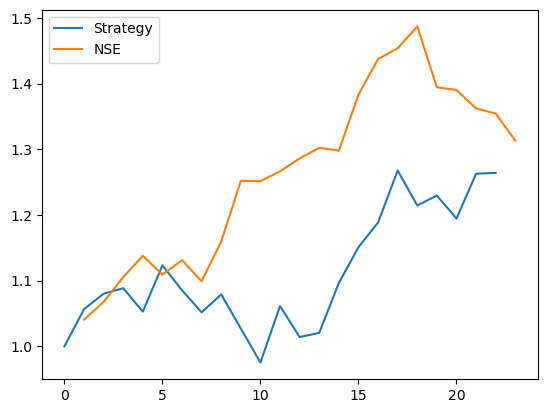

In [249]:
fig, ax = plt.subplots()
plt.plot((1+result).cumprod(), label = 'Strategy')
plt.plot((1+ NSE_DATA['mon_rtn'].reset_index(drop=True)).cumprod(), label = 'NSE')
plt.legend()
plt.show()

In [250]:
def CAGR2(DF):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility2(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe2(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    

def max_dd2(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd